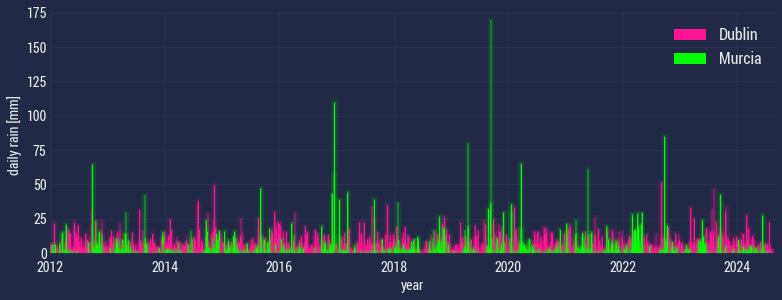

In [1]:
# Import Meteostat library and dependencies
from datetime import datetime

import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

# Font
fontUrl = 'https://github.com/veg/hy454/raw/master/lib/hy454/data/fonts/ttf/Roboto-Condensed.ttf'
import urllib.request
urllib.request.urlretrieve(fontUrl, fontUrl.split('/')[-1])
from matplotlib import font_manager
font_dirs = ['.']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# set font
plt.rcParams['font.family'] = 'Roboto Condensed'

    
from meteostat import Point, Daily
import numpy as np

# Create Point
murcia = Point(37.9922,-1.1307, 43)
bordeaux = Point(44.7743, -0.6189, 10)
heidelberg = Point(49.398750, 8.672434, 114)
dublin = Point(53.3498, -6.2603,20)
    
# Create a figure and plot the line on it
plt.figure(figsize=(13,4.5))

startyear = 2012
for yyy in np.arange(startyear,2025,1):
    
    # Set time period
    start = datetime(yyy, 1, 1)
    end = datetime(yyy, 12, 31)
    
    # Get daily data
    data = Daily(dublin, start, end)
    data = data.fetch()
    precipitation = data['prcp']
    mask = np.array([1 if p>0 else 0 for p in precipitation])
    day = [foo for foo in range(len(precipitation))]
    dublinBars = plt.bar( data.index , precipitation , width=5 , facecolor='deeppink',alpha=1., label='Dublin')
    plt.bar( data.index , mask*(precipitation+0.5) , width=10 , facecolor='deeppink',alpha=0.2)
    plt.bar( data.index , mask*(precipitation+1) , width=15 , facecolor='deeppink',alpha=0.2)
    plt.bar( data.index , mask*(precipitation+2) , width=40 , facecolor='deeppink',alpha=0.1)

    # Get daily data 
    data = Daily(murcia, start, end)
    data = data.fetch()
    precipitation = data['prcp']
    mask = np.array([1 if p>0 else 0 for p in precipitation])
    day = [foo for foo in range(len(precipitation))]
    murciaBars = plt.bar( data.index , precipitation , width=5 , facecolor='lime',alpha=1, label='Murcia')
    plt.bar( data.index , mask*(precipitation+0.5) , width=10 , facecolor='lime',alpha=0.2)
    plt.bar( data.index , mask*(precipitation+1) , width=15 , facecolor='lime',alpha=0.2)
    plt.bar( data.index , mask*(precipitation+2) , width=40 , facecolor='lime',alpha=0.1)
    

plt.ylim(-3,175)
plt.xlim( datetime(startyear, 1, 1) , datetime(yyy, 8, 31) )
plt.legend(loc=1,fontsize=16,handles=[dublinBars,murciaBars])

ax = plt.gca()
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('daily rain [mm]',fontsize=14)
plt.xlabel('year',fontsize=14)

plt.savefig('rain.png',bbox_inches='tight',dpi=100)